# THE2 - CENG403 Spring 2024

This document contains the backbone structure for the take-home exam. You should complete this template for your solution.

# 1 The Gergen Library [THE1 Solution]

This section presents the code for solving THE1. You can modify any part as desired. The implementation of `rastgele_gercek`, `rastgele_dogal`, and `gergen` classes, as well as the necessary operations in the `Operation` class, are all provided.

## 1.1 Implementation for `rastgele_gercek` and `rastgele_dogal`

Uniform distribution is the only option available for `rastgele_dogal`. However, for `rastgele_gercek`, you can choose between uniform and gaussian distributions.

In [1]:
def cekirdek(sayi: int):
    #Sets the seed for random number generation
    random.seed(sayi)

def rastgele_dogal(boyut, aralik=None, dagilim='uniform'):
    """
    Generates data of specified dimensions with random integer values and returns a gergen object.

    Parameters:
    boyut (tuple): Shape of the desired data.
    aralik (tuple, optional): (min, max) specifying the range of random values. Defaults to None, which implies a default range.
    dagilim (string, optional): Distribution of random values ('uniform' or other types). Defaults to 'uniform'.

    Returns:
    gergen: A new gergen object with random integer values.
    """

    # Set a default range if aralik is not provided
    if aralik is None:
        aralik = (0, 10)

    def generate_random_data(shape):
        if len(shape) == 1:
            return [random_value(aralik, dagilim) for _ in range(shape[0])]
        else:
            return [generate_random_data(shape[1:]) for _ in range(shape[0])]

    def random_value(aralik, dagilim):
        if dagilim == 'uniform':
            return random.randint(*aralik)
        else:
            raise ValueError(f"Unsupported distribution: {dagilim}")

    data = generate_random_data(boyut)
    return gergen(data)

def rastgele_gercek(boyut, aralik=(0.0, 1.0), dagilim='uniform'):
    """
    Generates a gergen of specified dimensions with random floating-point values.

    Parameters:
    boyut (tuple): Shape of the desired gergen.
    aralik (tuple, optional): (min, max) specifying the range of random values. Defaults to (0.0, 1.0) for uniform distribution.
    dagilim (string, optional): Distribution of random value (e.g., 'uniform', 'gaussian'). Defaults to 'uniform'.

    Returns:
    gergen: A new gergen object with random floating-point values.
    """
    def generate_random_data(shape):
        if len(shape) == 1:
            return [random_value(aralik, dagilim) for _ in range(shape[0])]
        else:
            return [generate_random_data(shape[1:]) for _ in range(shape[0])]

    def random_value(aralik, dagilim):
        if dagilim == 'uniform':
            return random.uniform(*aralik)
        elif dagilim == 'gaussian':
            mean, std_dev = aralik
            return random.gauss(mean, std_dev)
        else:
            raise ValueError(f"Unsupported distribution: {dagilim}")

    data = generate_random_data(boyut)
    return gergen(data)



In [2]:
import random
import math
from typing import Union
import matplotlib.pyplot as plt

## 1.2 Operation Class Definition

You can find the latest version of the Operation class here.

In [3]:
class Operation:
    def __call__(self, *operands, **kwargs):
        """
        Modified to accept keyword arguments as well.
        """
        self.operands = operands
        self.kwargs = kwargs  # Store keyword arguments separately
        self.outputs = None
        return self.ileri(*operands, **kwargs)

    def ileri(self, *operands, **kwargs):
        """
        Defines the forward pass of the operation.
        Must be implemented by subclasses to perform the actual operation.

        Parameters:
            *operands: Variable length operand list.
            **kwargs: Variable length keyword argument list.

        Raises:
            NotImplementedError: If not overridden in a subclass.
        """
        raise NotImplementedError

    def geri(self, grad_input):
        """
        Defines the backward pass of the operation.
        Must be implemented by subclasses to compute the gradients.

        Parameters:
            grad_input: The gradient of the loss w.r.t. the output of this operation.

        """
        raise NotImplementedError



## 1.3 Implemented Operations
The section contains all implementations from THE1. You can customize any part as you like, and you need to complete the `TODO` sections.


### 1.3.1 Add

In [4]:
class Add(Operation):
    def ileri(self, a, b):
        """
        Adds two gergen objects or a gergen object and a scalar.
        You can modify this function.
        """
        if isinstance(a, gergen) and isinstance(b, gergen):
            self.operands = [a, b]
            result = gergen(self.add_gergen(a.duzlestir().listeye(), b.duzlestir().listeye()), operation=self)
            result.boyutlandir(a.boyut())
        elif isinstance(a, gergen) and isinstance(b, (list)):
            self.operands = [a]
            result = gergen(self.add_list(a.listeye(), b), operation=self)
        elif isinstance(b, gergen) and isinstance(a, (list)):
            self.operands = [b]
            result = gergen(self.add_list(b.listeye(), a), operation=self)
        elif isinstance(a, gergen) and isinstance(b, (int, float)):
            self.operands = [a]
            result = gergen(self.add_scalar(a.listeye(), b), operation=self)
        elif isinstance(b, gergen) and isinstance(a, (int, float)):
            self.operands = [b]
            result = gergen(self.add_scalar(b.listeye(), a), operation=self)
        else:
            raise ValueError("Add operation requires at least one gergen operand.")

        return result

    def add_scalar(self, a, scalar):
        if isinstance(a, list):
            return [self.add_scalar(elem, scalar) for elem in a]
        else:
            return a + scalar

    def add_gergen(self, a, b):
        # Check if 'a' is a list
        if isinstance(a, list):
            # Check if 'b' is a list
            if isinstance(b, list):
                if len(a) != len(b):
                    raise ValueError("Dimensions of gergen objects do not match for addition.")
                return [a[i] + b[i] for i in range(len(a))]
            # If 'a' is a list and 'b' is a scalar
            elif not isinstance(b, list):
                return [item + b for item in a]

        # If 'a' is a scalar and 'b' is a list
        elif not isinstance(a, list) and isinstance(b, list):
            return [a + item for item in b]
        # Direct addition for scalars, or fallback error for unsupported types
        elif not isinstance(a, list) and not isinstance(b, list):
            return a + b

    def add_list(self, a, b):
        # Check if 'a' is a list
        if isinstance(a, list) and isinstance(b, list):
            return [self.add_list(elem_a, elem_b) for elem_a, elem_b in zip(a, b)]
        # If 'a' is list and b is scalar
        elif isinstance(a, list) and not isinstance(b, list):
            return [self.add_list(elem_a, b) for elem_a in a]
        elif not isinstance(a, list) and isinstance(b, list):
            return [self.add_list(a, elem_b) for elem_b in b]
        elif not isinstance(a, list) and not isinstance(b, list):
            return a + b

    def geri(self, grad_input):
        '''
        TODO: Implement the gradient computation for the Add operation.
        '''
        #summations gradients are the same as the input gradients
        grad_a = grad_input
        grad_b = grad_input
        
        return grad_a, grad_b



### 1.3.2 Sub

In [5]:
class Sub(Operation):
    """
    Subtracts two gergen objects or a gergen object and a scalar.
    You can modify this function.
    """
    def ileri(self, a, b):
        if isinstance(a, gergen) and isinstance(b, gergen):
            self.a, self.b = a, b
            self.operands = [a, b]
            result = gergen(self.subtract_gergen(a.duzlestir().veri, b.duzlestir().veri), operation=self)
            result.boyutlandir(a.boyut())
        elif isinstance(a, gergen) and isinstance(b, (list)):
            self.a = a
            self.operands = [a]
            result = gergen(self.subtract_list(a.veri, b), operation=self)
        elif isinstance(b, gergen) and isinstance(a, (list)):
            self.b = b
            self.operands = [b]
            result = gergen(self.subtract_list(a, b.veri), operation=self)
        elif isinstance(a, gergen) and isinstance(b, (int, float)):
            self.b = b
            self.operands = [a]
            result = gergen(self.subtract_scalar(a.veri, b), operation=self)
        elif isinstance(b, gergen) and isinstance(a, (int, float)):
            self.b = b
            self.operands = [b]
            result = gergen(self.subtract_scalar(b.veri, a), operation=self)
        else:
            raise ValueError("Sub operation requires at least one gergen operand.")
        return result

    def subtract_scalar(self, a, scalar):
        if isinstance(a, list):
            return [self.subtract_scalar(elem, scalar) for elem in a]
        else:
            return a - scalar

    def subtract_list(self, a, b):
        # Check if 'a' is a list
        if isinstance(a, list) and isinstance(b, list):
            return [self.subtract_list(elem_a, elem_b) for elem_a, elem_b in zip(a, b)]
        # If 'a' is list and b is scalar
        elif isinstance(a,list) and not isinstance(b, list):
            return [self.subtract_list(elem_a, b) for elem_a in a]
        elif not isinstance(a,list) and isinstance(b, list):
            return [self.subtract_list(a, elem_b) for elem_b in b]
        elif not isinstance(a, list) and not isinstance(b, list):
            return a - b

    def subtract_gergen(self, a, b):
        # Check if 'a' is a list
        if isinstance(a, list):
            # Check if 'b' is a list
            if isinstance(b, list):
                if len(a) != len(b):
                    raise ValueError("Dimensions of gergen objects do not match for subtraction.")
                return [a[i] - b[i] for i in range(len(a))]
            # If 'a' is a list and 'b' is a scalar
            elif not isinstance(b, list):
                return [item - b for item in a]

        # If 'a' is a scalar and 'b' is a list
        elif not isinstance(a, list) and isinstance(b, list):
            return [a - item for item in b]
        # Direct subtraction for scalars, or fallback error for unsupported types
        elif not isinstance(a, list) and not isinstance(b, list):
            return a - b

    def geri(self, grad_input):
        '''
        TODO: Implement the gradient computation for the Sub operation.
        '''
        #subtractions gradients 
        grad_a = grad_input
        grad_b = (-1) * grad_input
        
        return grad_a, grad_b

### 1.3.3 TrueDiv

In [6]:
class TrueDiv(Operation):
    """
    Divides two gergen objects or a gergen object and a scalar.
    You can modify this function.
    """
    def ileri(self, a, b):
        if isinstance(a, gergen) and isinstance(b, gergen):
            self.a, self.b = a, b
            self.operands = [a, b]
            result = gergen(self.divide_elements(a.duzlestir().veri, b.duzlestir().veri), operation=self)
            result.boyutlandir(a.boyut())
        elif isinstance(a, gergen) and isinstance(b, (int, float)):
            self.a = a
            self.operands = [a]
            result = gergen(self.divide_scalar(a.veri, b), operation=self)

        elif isinstance(b, gergen) and isinstance(a, (int, float)):
            # Division of a scalar by a gergen object is not typically defined,
            # but you can implement it based on your requirements.
            raise NotImplementedError("Division of a scalar by a gergen object is not implemented.")
        else:
            raise ValueError("TrueDiv operation requires at least one gergen operand.")

        return result

    def divide_scalar(self, a, scalar):
        if isinstance(a, list):
            return [self.divide_scalar(elem, scalar) for elem in a]
        else:
            if scalar == 0:
                raise ZeroDivisionError("Division by zero.")
            return a / scalar

    def divide_elements(self, a, b):
        # Both a and b are non-lists (scalars), perform direct division
        if not isinstance(a, list) and not isinstance(b, list):
            if b == 0:
                raise ZeroDivisionError("Division by zero.")
            return a / b
        # Both a and b are lists, perform element-wise division
        elif isinstance(a, list) and isinstance(b, list):
            if len(a) != len(b):
                raise ValueError("Dimensions of gergen objects do not match for division.")
            return [self.divide_elements(elem_a, elem_b) for elem_a, elem_b in zip(a, b)]
        # One of a or b is a list and the other is a scalar, divide each element of the list by the scalar
        elif isinstance(a, list):
            return [self.divide_elements(elem, b) for elem in a]
        else:
            raise NotImplementedError("Division of scalar by a list is not typically defined.")

    def geri(self, grad_input):
        '''
        TODO (Optional): Implement the gradient computation for the TrueDiv operation.
        '''
        pass



### 1.3.4 Mul

In [7]:
class Mul(Operation):
    """
    Multiplies two gergen objects or a gergen object and a scalar.
    You can modify this function.
    """
    def ileri(self, a, b):

        if isinstance(a, gergen) and isinstance(b, gergen):
            self.a, self.b = a, b
            self.operands = [a, b]
            # a is a scalar gergen
            if a.uzunluk() == 1:
                result = gergen(self.multiply_scalar(b.veri,a.veri), operation= self)
            # b is a scalar gergen
            elif b.uzunluk() == 1:
                result = gergen(self.multiply_scalar(a.veri,b.veri), operation = self)
            else:
                result = gergen(self.multiply_elements(a.duzlestir().veri, b.duzlestir().veri), operation=self)
                result.boyutlandir(a.boyut())
        elif isinstance(a, gergen) and isinstance(b, (int, float)):
            self.a = a
            self.b = b
            self.operands = [a]
            result = gergen(self.multiply_scalar(a.veri, b), operation=self)
        elif isinstance(b, gergen) and isinstance(a, (int, float)):
            self.b = b
            self.b = a
            self.operands = [b]
            result = gergen(self.multiply_scalar(b.veri, a), operation=self)
        else:
            raise ValueError("Mul operation requires at least one gergen operand.")

        return result

    def multiply_scalar(self, a, scalar):
        if isinstance(a, list):
            return [self.multiply_scalar(elem, scalar) for elem in a]
        else:
            return a * scalar

    def multiply_elements(self, a, b):
        # Both a and b are non-lists (scalars), perform direct multiplication
        if not isinstance(a, list) and not isinstance(b, list):
            return a * b
        # Both a and b are lists, perform element-wise multiplication
        elif isinstance(a, list) and isinstance(b, list):
            if len(a) != len(b):
                raise ValueError("Dimensions of gergen objects do not match for multiplication.")
            return [self.multiply_elements(elem_a, elem_b) for elem_a, elem_b in zip(a, b)]
        # One of a or b is a list and the other is a scalar, multiply each element of the list by the scalar
        elif isinstance(a, list):
            return [self.multiply_elements(elem, b) for elem in a]
        else:
            return [self.multiply_elements(a, elem) for elem in b]

    def geri(self, grad_input):
        '''
        TODO: Implement the gradient computation for the Mul operation.
        '''
        gradient_a = grad_input * self.b
        gradient_b = grad_input * self.a

        if isinstance(self.a, gergen):
            if isinstance(self.b, gergen):
                return gradient_a, gradient_b
            elif isinstance(self.b, (int, float)):
                return gradient_a, 0
        
        if isinstance(self.b, gergen):
            if isinstance(self.a, gergen):
                return gradient_a, gradient_b
            elif isinstance(self.a, (int, float)):
                return 0, gradient_b



### 1.3.5 Us

In [8]:
class Us(Operation):
    """
    Power operation.
    You can modify this function.
    """
    def ileri(self, a, n):
        self.a = a
        self.n = n
        self.operands = [a]
        result = gergen(self.power_elements(a.veri, n), operation=self)
        return result

    def power_elements(self, a, n):

        if isinstance(a, list):
            return [self.power_elements(elem, n) for elem in a]
        else:
            return a ** n
    def multiply_elements(self, a, b):
        # Both a and b are non-lists (scalars), perform direct multiplication
        if not isinstance(a, list) and not isinstance(b, list):
            return a * b
        # Both a and b are lists, perform element-wise multiplication
        elif isinstance(a, list) and isinstance(b, list):
            if len(a) != len(b):
                raise ValueError("Dimensions of gergen objects do not match for multiplication.")
            return [self.multiply_elements(elem_a, elem_b) for elem_a, elem_b in zip(a, b)]
        # One of a or b is a list and the other is a scalar, multiply each element of the list by the scalar
        elif isinstance(a, list):
            return [self.multiply_elements(elem, b) for elem in a]
        else:
            return [self.multiply_elements(a, elem) for elem in b]

    def geri(self, grad_input):
        '''
        TODO: Implement the gradient computation for the Power operation.
        '''
        return grad_input * self.n * (self.a.us(self.n - 1))


### 1.3.6 Log10

In [9]:
class Log10(Operation):
    """
    Log10 operation
    You can modify this function.
    """
    def ileri(self, a):
        self.a = a
        self.operands = [a]
        # Recursively check for non-positive values in the nested list structure
        if self.contains_non_positive(self.a.veri):
            raise ValueError("Logarithm undefined for non-positive values.")
        result = gergen(self.log_elements(a.veri), operation=self)
        return result

    def log_elements(self, a):
        # Recursively apply the base 10 logarithm to each element
        if isinstance(a, list):
            return [self.log_elements(elem) for elem in a]
        else:
            return math.log10(a)

    def contains_non_positive(self, a):
        # Recursively check for non-positive values and flatten the results
        def check_and_flatten(a):
            flag = False
            if isinstance(a, list):
                # Use a generator expression to recursively check each element and flatten the result
                for ele in a:
                    flag = check_and_flatten(ele)
            else:
                if a <=0:
                    return True
            return flag
        # Use 'any' on a flattened generator of boolean values
        return check_and_flatten(a)
    def multiply_elements(self, a, scalar):
        # Recursively multiply each element by the scalar
        if isinstance(a, list):
            return [self.multiply_elements(elem, scalar) for elem in a]
        else:
            return a * scalar

    def divide_elements(self, grad_output, b):
        # Recursively divide grad_output by b, assuming they have the same structure
        if isinstance(b, list):
            return [self.divide_elements(elem_grad, elem_b) for elem_grad, elem_b in zip(grad_output, b)]
        else:
            return grad_output / b

    def geri(self, grad_input):
        '''
        TODO (Optional): Implement the gradient computation for the Log10 operation.
        '''
        pass



### 1.3.7 Ln

In [10]:
class Ln(Operation):
    def ileri(self, a):
        """
        Implements the forward pass for the Ln operation.
        You can modify this function.
        """
        if not isinstance(a, gergen):
            raise ValueError("Ln operation requires a gergen operand.")
        self.a = a
        self.operands = [a]
        if self.contains_non_positive(self.a.listeye()):
            raise ValueError("Logarithm undefined for non-positive values.")

        result = gergen(self.log_elements(a.listeye()), operation=self)
        return result

    def log_elements(self, a):
        # Recursively apply the base 10 logarithm to each element
        if isinstance(a, list):
            return [self.log_elements(elem) for elem in a]
        else:
            return math.log(a) if a > 0 else math.log(a + 10**-4)

    def contains_non_positive(self, a):
        # Recursively check for non-positive values
        def check_and_flatten(a):
            if isinstance(a, list):
                return any(check_and_flatten(elem) for elem in a)
            else:
                if a <= 0:
                    a= 1
                    return True
                else:
                    return False
        # Use 'any' on a flattened generator of boolean values
        return check_and_flatten(a)

    def geri(self, grad_input):
        '''
        TODO: Implement the gradient computation for the Ln operation.
        '''
        
        safe_denominator = self.a.veri + (self.a.veri == 0) * 10**-4  # Small epsilon to avoid division by zero
        gradient_a = grad_input / gergen(safe_denominator, operation=self)
        return gradient_a



### 1.3.8 Sin, Cos, Tan

In [11]:
def apply_elementwise(g, func):
    """
    Applies a given function element-wise to the data in a gergen object.
    This version is capable of handling nested lists of any depth.
    """

    def recursive_apply(data):
        if isinstance(data, list):
            # Recursively apply func to each element if data is a list
            return [recursive_apply(sublist) for sublist in data]
        else:
            # Apply func directly if data is a scalar (non-list)
            return func(data)

    # Use the recursive function to apply the operation to the gergen object's data
    return recursive_apply(g.listeye())


class Sin(Operation):
    def ileri(self, a):
        """
        Implements the forward pass for the Sin operation.
        You can modify this function.
        """
        self.operands = [a]
        result = gergen(apply_elementwise(a, math.sin), operation=self)
        return result

    def geri(self, grad_output):
        cos_grad = apply_elementwise(self.operands[0], math.cos)  # Compute cosine of the original input
        return grad_output * gergen(cos_grad, operation=self)  # Multiply gradient output by cosine gradients


class Cos(Operation):
    def ileri(self, a):
        """
        Implements the forward pass for the Cos operation.
        You can modify this function.
        """
        self.operands = [a]
        result = gergen(apply_elementwise(a, math.cos), operation=self)
        return result

    def geri(self, grad_output):
        neg_sin_grad = apply_elementwise(self.operands[0], lambda x: -math.sin(x))  # Compute negative sine of the original input
        return grad_output * gergen(neg_sin_grad, operation=self)  # Multiply gradient output by negative sine gradients


class Tan(Operation):
    def ileri(self, a):
        """
        Implements the forward pass for the Tan operation.
        You can modify this function.
        """
        self.operands = [a]
        result = gergen(apply_elementwise(a, math.tan), operation=self)
        return result

    def geri(self, grad_output):
        sec2_grad = apply_elementwise(self.operands[0], lambda x: 1 / (math.cos(x)**2))  # Compute sec^2 of the original input
        return grad_output * gergen(sec2_grad, operation=self)  # Multiply gradient output by sec^2 gradients

### 1.3.9 Topla

In [12]:
class Topla(Operation):
    def ileri(self, a, eksen=None):
        """
        Forward pass for the Topla operation.
        You can modify this function.
        """

        def sum_elements(lst):
            if isinstance(lst[0], list):
                return [sum_elements(sublst) for sublst in zip(*lst)]
            else:
                return sum(lst)

        def sum_along_axis(data, axis):
            if axis == 0:
                return sum_elements(data)
            else:
                return [sum_along_axis(subdata, axis - 1) for subdata in data]
        self.operands = [a]
        if eksen is None:
            result = sum(a.duzlestir().listeye())
        elif isinstance(eksen, int):
            if eksen < 0 or eksen >= len(a.boyut()):
                raise ValueError("Axis out of bounds for gergen's dimensionality")
            result = sum_along_axis(a.listeye(), eksen)
        else:
            raise TypeError("Axis must be an integer or None")

        return gergen(result, operation=self)

    def geri(self, grad_input):
        """
        TODO(Optional): Implement the gradient computation for the Topla operation.
        """
        pass

### 1.3.10 Ortalama

In [13]:
class Ortalama(Operation):
    def ileri(self, a, eksen=None):
        """
        Forward pass for the Ortalama operation.
        """

        def average_elements(total_sum, total_elements):
            # Compute the average
            if isinstance(total_sum, list):
                # If total_sum is a list (multi-dimensional case), calculate the average for each sublist
                return [average_elements(ts, total_elements) for ts in total_sum]
            else:
                # For a single number, just divide
                return total_sum / total_elements
        self.operands = [a]
        sum_op = Topla()  # Instantiate the Sum operation

        total_sum = sum_op.ileri(a, eksen=eksen).listeye()

        if eksen is None:
            total_elements = a.uzunluk()
        else:
            if eksen < 0 or eksen >= len(a.boyut()):
                raise ValueError("Axis out of bounds for gergen's dimensionality")
            total_elements = a.boyut()[eksen]

        # Compute the average
        average_result = average_elements(total_sum, total_elements)

        return gergen(average_result, operation=self)

    def geri(self, grad_input):
        """
        Compute the gradient for the average operation, distributing it correctly based on the original input dimensions and axis.
        """
        #input_shape = self.operands[0].boyut()  # Get the shape of the original input

        # Average was taken over the entire gergen
        grad_output = grad_input / self.operands[0].uzunluk()
        
        return grad_output
        


### 1.3.11 IcCarpim

In [14]:

def matrix_multiply(m1, m2):
    if len(m1[0]) != len(m2):
        raise ValueError("The number of columns in the first matrix must match the number of rows in the second matrix.")
    return [[sum(a * b for a, b in zip(row_a, col_b)) for col_b in zip(*m2)] for row_a in m1]


class IcCarpim(Operation):

    @staticmethod
    def matrix_multiply(m1, m2):
            if len(m1[0]) != len(m2):
                raise ValueError(
                    "The number of columns in the first matrix must match the number of rows in the second matrix.")
            return [[sum(a * b for a, b in zip(row_a, col_b)) for col_b in zip(*m2)] for row_a in m1]

    def ileri(self, a, b):
        self.a = a
        self.b = b
        self.operands = [a, b]
        if not isinstance(a, type(b)):
            raise ValueError("Both operands must be gergen objects.")

        def is_vector(v):
            return len(v.boyut()) == 1

        def is_matrix(m):
            return len(m.boyut()) == 2

        def vector_dot_product(v1, v2):
            if len(v1) != len(v2):
                raise ValueError("Vectors must have the same length for dot product.")
            return sum(x * y for x, y in zip(v1, v2))

        def matrix_multiply(m1, m2):
            if len(m1[0]) != len(m2):
                raise ValueError(
                    "The number of columns in the first matrix must match the number of rows in the second matrix.")
            return [[sum(a * b for a, b in zip(row_a, col_b)) for col_b in zip(*m2)] for row_a in m1]

        if len(a.boyut()) > 2 or len(b.boyut()) > 2:
            raise ValueError("Operands must both be either 1-D vectors or 2-D matrices.")
        elif is_vector(a) and is_vector(b):
            # Perform vector dot product
            result = vector_dot_product(a.listeye(), b.listeye())
        elif is_matrix(a) and is_matrix(b):
            # Perform matrix multiplication
            result = matrix_multiply(a.listeye(), b.listeye())
        else:
            raise ValueError("Operands must both be either 1-D vectors or 2-D matrices.")

        # Return result
        return gergen(result, operation=self)

    def geri(self, grad_input):
        """
        Implement the gradient computation for the Ic_Carpim operation.
        """

        grad_a = matrix_multiply(grad_input.listeye(), self.b.devrik().listeye())
        grad_b = matrix_multiply(self.a.devrik().listeye(), grad_input.listeye())

        grad_a = gergen(grad_a, operation=self)
        grad_b = gergen(grad_b, operation=self)

        return grad_a, grad_b
    

### 1.3.12 DisCarpim

In [15]:
class DisCarpim(Operation):
    def ileri(self, a, b):
        """
        Computes the outer product of two gergen objects.
        """

        if not isinstance(a, gergen) or not isinstance(b, gergen):
            raise ValueError("Both operands must be gergen objects.")

        # Ensure the veri attributes are lists representing vectors
        if not all(isinstance(x, (int, float)) for x in a.listeye()) or not all(
                isinstance(y, (int, float)) for y in b.listeye()):
            raise ValueError("Both gergen objects must contain 1-D numerical data.")

        self.operands = [a,b]
        # Compute the outer product
        result = [[x * y for y in b.listeye()] for x in a.listeye()]

        # Return a new gergen object with the outer product as its veri
        return gergen(result, operation=self)

    def geri(self, grad_input):
        """
        TODO(Optional): Implement the gradient computation for the Dis_Carpim operation.
        """
        pass

### 1.3.13 Gergen Class

In [16]:
class gergen:

    __veri = None  # A nested list of numbers representing the data
    D = None  # Transpose of data
    turev = None  # Stores the derivate
    operation = None  # Stores the operation that produced the gergen
    __boyut = None  # Dimensions of the gergen (Shape)
    requires_grad = True  # Flag to determine if the gradient should be computed

    def __init__(self, veri=None, operation=None, requires_grad=None):
        # The constructor for the 'gergen' class.
        
        if veri is None:
            self.__veri = []
            self.__boyut = (0,)
            self.D = None

        if operation is not None:
            self.operation = operation
        if requires_grad is not None:
            self.requires_grad = requires_grad

        else:
            self.__veri = veri
            self.__boyut = self.get_shape(veri, ())  # Assuming rectangular data
            self.D = None

    def __iter__(self):
        # The __iter__ method returns the iterator object itself.
        # You can reset the iterator here if you want to allow multiple passes over the data.
        pass

    def __next__(self):
        # The __next__ method should return the next value from the iterator.
        pass

    def __getitem__(self, key):
        """
        Allows for indexing or slicing the gergen object's data.

        Parameters:
        key (int, slice, tuple): An integer or slice for one-dimensional indexing,
                                    or a tuple for multi-dimensional indexing/slicing.

        Returns:
        The element or a new gergen object corresponding to the provided key.
        """

        # Helper function to handle recursive indexing/slicing
        def index_or_slice(data, key):
            if isinstance(key, int) or isinstance(key, slice):
                return data[key]
            elif isinstance(key, tuple):
                result = data
                for k in key:
                    result = index_or_slice(result, k)
                return result
            else:
                raise TypeError(f"Invalid index type: {type(key)}")

        # Perform the indexing or slicing operation
        result = index_or_slice(self.__veri, key)

        # If the result is a list, return it wrapped in a new gergen object
        return gergen(result)

    def __str__(self):
        # Generates a string representation
        if self.uzunluk() == 0:
            return "Empty Gergen"
        else:
            shape_str = ""
            for b in self.boyut():
                shape_str += str(b) + "x"
            if shape_str == "":
                shape_str += "0x"
            return shape_str[:-1] + " boyutlu gergen:" + "\n" + self.str_helper(self.listeye(), len(self.boyut()))

    @property
    def veri(self):
        return self.__veri

    def str_helper(self, data, shape, depth=0):
        if not shape:
            return str(data)
        elif not isinstance(data[0], list):
            return str(data)
        else:
            inner_results = []
            for subdata in data:
                inner_results.append(self.str_helper(subdata, shape, depth + 1))

            result = "[" + ("\n" * (shape - depth - 1)).join(r for r in inner_results) + "]"
            return result

    @staticmethod
    def get_shape(lst, shape=()):
        if not isinstance(lst, list):
            # base case
            return shape
        # peek ahead and assure all lists in the next depth
        # have the same length
        if isinstance(lst[0], list):
            l = len(lst[0])
            if not all(len(item) == l for item in lst):
                msg = 'not all lists have the same length'
                raise ValueError(msg)

        shape += (len(lst),)
        # recurse
        shape = gergen.get_shape(lst[0], shape)

        return shape

    @staticmethod
    def custom_zeros(shape):
        """
        Creates a multi-dimensional array of zeros with the specified shape.

        Parameters:
        shape (tuple): A tuple representing the dimensions of the array.

        Returns:
        A nested list (multi-dimensional array) filled with zeros.
        """
        if not shape:  # If shape is empty or reaches the end of recursion
            return 0
        # Recursively build nested lists
        return [gergen.custom_zeros(shape[1:]) for _ in range(shape[0])]

    # HELPER
    @staticmethod
    def prod(iterable):
        """Utility function to calculate the product of elements in an iterable."""
        result = 1
        for i in iterable:
            result *= i
        return result

    def __mul__(self, other: Union['gergen', int, float]) -> 'gergen':
        mul_operation = Mul()
        result_gergen = mul_operation(self, other)
        return result_gergen

    def __rmul__(self, other: Union['gergen', int, float]) -> 'gergen':
        mul_operation = Mul()
        result_gergen = mul_operation(self, other)
        return result_gergen

    def __truediv__(self, other: Union['gergen', int, float]) -> 'gergen':
        div_operation = TrueDiv()
        result_gergen = div_operation(self, other)
        return result_gergen

    def __rtruediv__(self, other: Union['gergen', int, float]) -> 'gergen':
        div_operation = TrueDiv()
        result_gergen = div_operation(self, other)
        return result_gergen

    def __add__(self, other):
        add_operation = Add()
        result_gergen = add_operation(self, other)
        return result_gergen

    def __radd__(self, other):
        add_operation = Add()
        result_gergen = add_operation(self, other)
        return result_gergen

    def __sub__(self, other):
        sub_operation = Sub()
        result_gergen = sub_operation(self, other)
        return result_gergen

    def __rsub__(self, other):
        sub_operation = Sub()
        result_gergen = sub_operation(other, self)
        return result_gergen

    def uzunluk(self):
        # Returns the total number of elements in the gergen
        total = 1
        for ele in self.__boyut:
            total *= ele
        return total

    def boyut(self):
        # Returns the shape of the gergen
        return self.__boyut

    def devrik(self):
        # Returns the transpose of gergen
        # Check if the gergen object is scalar
        if self.uzunluk() == 1:
            return gergen(self.__veri)
        # Check if the gergen object represents a 1D list (vector)
        if isinstance(self.__veri, list) and all(not isinstance(item, list) for item in self.__veri):
            # Convert each element into a list (column vector)
            return gergen([[item] for item in self.__veri])
        else:
            # Handle higher-dimensional cases (e.g., 2D matrices, 3D tensors, etc.)
            new_boyut = tuple(reversed(self.__boyut))
            order = list(reversed(range(len(self.__boyut))))
            arr = self.custom_zeros(new_boyut)  # Assuming custom_zeros initializes an array with the given shape
            paths = [0] * len(self.__boyut)
            while paths[0] < self.__boyut[0]:
                ref = self.listeye()
                place = arr
                for i in range(len(paths) - 1):
                    ref = ref[paths[i]]
                    place = place[paths[order[i]]]

                place[paths[order[-1]]] = ref[paths[-1]]
                paths[-1] += 1
                for i in range(len(paths) - 1, 0, -1):
                    if paths[i] >= self.__boyut[i]:
                        paths[i] = 0
                        paths[i - 1] += 1
                    else:
                        break
            self.D = gergen(arr)
            return gergen(arr)

    def L1(self):
        # Calculates and returns the L1 norm
        flattened_data = self.duzlestir().__veri  # Assuming flatten returns a gergen object

        # Calculate the L1 norm by summing the absolute values of elements in the flattened list
        l1_norm = sum(abs(item) for item in flattened_data)

        return l1_norm

    def L2(self):
        # Assuming flatten returns a gergen object and __veri holds the flattened data
        flattened_data = self.duzlestir().__veri

        # Calculate the L2 norm by summing the squares of elements in the flattened list and then taking the square root
        l2_norm = sum(item ** 2 for item in flattened_data) ** 0.5

        return l2_norm

    def Lp(self, p):
        # Calculates and returns the Lp norm, where p should be positive integer
        if p <= 0:
            raise ValueError("p must be a positive integer for Lp norm.")
        # Assuming flatten returns a gergen object and __veri holds the flattened data
        flattened_data = self.duzlestir().__veri

        # Calculate the Lp norm by raising elements to the power of p, summing, and then taking the p-th root
        lp_norm = sum(abs(item) ** p for item in flattened_data) ** (1 / p)

        return lp_norm

    def listeye(self):
        # Converts the gergen object into a list or a nested list, depending on its dimensions.
        if isinstance(self.__veri, list):
            if not self.__veri:
                return []
            return self.__veri.copy()
        else:
            return self.__veri

    def duzlestir(self):
        """Flattens a multidimensional list (self.__veri) into a 1D list."""
        if not isinstance(self.__veri, list):
            return gergen(self.__veri)
        flattened_list = []
        # Create a stack with the initial list
        stack = [self.__veri]

        # Process the stack
        while stack:
            current_item = stack.pop()
            if isinstance(current_item, list):
                # Extend the stack by reversing the current item list
                # to maintain the original order in the flattened list
                stack.extend(current_item[::-1])
            else:
                # If it's not a list, add it to the flattened list
                flattened_list.append(current_item)

        # Since we're appending elements to the end, but processing the stack in LIFO order,
        # we need to reverse the flattened list to restore the original element order
        flattened_list.reverse()

        # Create a new gergen instance with the flattened list
        return gergen(flattened_list)

    def boyutlandir(self, yeni_boyut):
        """Reshapes the gergen object to a new shape 'yeni_boyut', specified as a tuple."""
        # Flatten the data first
        flat_data = list(self.duzlestir().__veri)

        def reshape_helper(data, dims):
            if not dims:
                return data.pop(0)
            return [reshape_helper(data, dims[1:]) for _ in range(dims[0])]

        # Check if the new shape is compatible with the number of elements
        if self.prod(yeni_boyut) != len(flat_data):
            raise ValueError("New shape must have the same number of elements as the original.")

        # Use the helper to create the reshaped data and update the object's internal state
        self.__veri = reshape_helper(flat_data, yeni_boyut)
        self.__boyut = yeni_boyut

    def ic_carpim(self, other):
        ic_carpim_operation = IcCarpim()
        result_gergen = ic_carpim_operation(self, other)
        return result_gergen

    def dis_carpim(self, other):
        dis_carpim_operation = DisCarpim()
        result_gergen = dis_carpim_operation(self, other)
        return result_gergen

    def us(self, n):
        # Applies the power function to each element of the gergen object.
        power_operation = Us()
        result_gergen = power_operation(self, n)
        return result_gergen

    def log(self):
        # Applies the log function to each element of the gergen object.
        log_operation = Log10()
        result_gergen = log_operation(self)
        return result_gergen

    def ln(self):
        # Applies the ln function to each element of the gergen object.
        log_operation = Ln()
        result_gergen = log_operation(self)
        return result_gergen

    def sin(self):
        # Applies the sin function to each element of the gergen object.
        sin_operation = Sin()
        result_gergen = sin_operation(self)
        return result_gergen

    def cos(self):
        # Applies the cos function to each element of the gergen object.
        cos_operation = Cos()
        result_gergen = cos_operation(self)
        return result_gergen

    def tan(self):
        # Applies the tan function to each element of the gergen object.
        tan_operation = Tan()
        result_gergen = tan_operation(self)
        return result_gergen

    def topla(self, eksen=None):
        # Calculates the sum of the elements of the gergen object, optionally along a specified axis 'eksen'.
        topla_operation = Topla()
        result_gergen = topla_operation(self, eksen=eksen)
        return result_gergen

    def ortalama(self, eksen=None):
        # Calculates the average of the elements of the gergen object, optionally along a specified axis 'eksen'.
        ortalama_operation = Ortalama()
        result = ortalama_operation(self, eksen=eksen)
        return result

    def turev_al(self, grad_output=1):
        self.turev = grad_output

        if self.operation is None:
            return grad_output
        
        if type(self.operation) == ReLU:
            grad = self.operation.geri(self.turev)
            self.operation.operands[0].turev_al(grad)

        elif type(self.operation) == Softmax:
            self.operation.operands[0].turev_al(self.turev)

        elif len(self.operation.operands) == 1:
            grad = self.operation.geri(self.turev)
            self.operation.operands[0].turev_al(grad)

        elif len(self.operation.operands) == 2:
            grad_a, grad_b = self.operation.geri(self.turev)
            self.operation.operands[0].turev_al(grad_a)
            self.operation.operands[1].turev_al(grad_b)

        else:
            raise ValueError("Invalid number of operands in the operation.")
    

        self.operation = None

        
    

# 2 The MLP Implementation

Now, you need to complete the MLP implementation. Your task is to complete the MLP implementation by following the steps outlined.

## 2.1 Katman Class

To complete MLP implementation, we first need to implement Katman (Layer) class. Implementing the Katman class involves defining its structure and operational methods such as the necessary mathematical operations, integrating activation functions, and setting up mechanisms for learning the layer's parameters during training.

In [17]:
import math

class Katman:
    def __init__(self, input_size, output_size, activation=None):
        """
        Initializes a layer with given input size, output size, and activation function.
        
        Parameters:
        input_size (int): Number of input features.
        output_size (int): Number of output features.
        activation (object, optional): Activation function instance (e.g., ReLU, Softmax). Default is None.
        """
        if isinstance(activation, ReLU):
            scale = math.sqrt(2.0 / input_size) / 10  # He initialization for ReLU, scaled down
        else:
            scale = math.sqrt(1.0 / input_size) / 10  # Xavier initialization for others, scaled down
        
        self.weights = rastgele_gercek((input_size, output_size), (0, scale))
        self.biases = rastgele_gercek((1, output_size), (0, scale))
        self.activation = activation

    def ileri(self, x):
        """
        Forward pass through the layer.
        
        Parameters:
        x (gergen): Input tensor.
        
        Returns:
        gergen: Output tensor after applying weights, biases, and activation function.
        """
        z = x.ic_carpim(self.weights) + self.biases
        return self.activation.ileri(z) if self.activation else z
    
    def update_parameters(self, learning_rate):
        """
        Updates the parameters (weights and biases) using the computed gradients.
        
        Parameters:
        learning_rate (float): Learning rate for parameter updates.
        """
        if self.weights.turev is not None:
            self.weights.veri = [[w - learning_rate * tw for w, tw in zip(row, t_row)]
                                 for row, t_row in zip(self.weights.veri, self.weights.turev)]
            self.weights.turev = None  # Reset gradients

        if self.biases.turev is not None:
            self.biases.veri = [[b - learning_rate * tb for b, tb in zip(row, t_row)]
                                for row, t_row in zip(self.biases.veri, self.biases.turev)]
            self.biases.turev = None  # Reset gradients

    def reset_gradients(self):
        """
        Resets the gradients of weights and biases to None.
        """
        self.weights.turev = None
        self.biases.turev = None


## 2.2 ReLU Operation

The `ReLU` class encapsulates the Rectified Linear Unit (ReLU) activation function. Characterized by the formula $f(x) = \max(0, x)$, the ReLU function modifies the input tensor by setting all its negative elements to zero while preserving the positive values.

The implementation of the `ReLU` class needs two principal methods:

1. **`ileri(self, x)`:** Termed `ileri` to denote the forward propagation phase, this method applies the ReLU function on an input tensor `x`.

2. **`geri(self, grad_input)`:** Labeled `geri`, indicating the backward propagation stage, this function is tasked with calculating the gradient of the ReLU function relative to the input tensor, given a gradient input `grad_input`.

In [18]:
def apply_elementwise(g, func):
    """
    Applies a given function element-wise to the data in a gergen object.
    This version is capable of handling nested lists of any depth.
    """

    def recursive_apply(data):
        if isinstance(data, list):
            # Recursively apply func to each element if data is a list
            return [recursive_apply(sublist) for sublist in data]
        else:
            # Apply func directly if data is a scalar (non-list)
            return func(data)

    # Use the recursive function to apply the operation to the gergen object's data
    return recursive_apply(g.listeye())


class ReLU(Operation):
    def ileri(self, x):
        """
        TODO: ReLU activation function
        """
        self.operands = [x]
        gergen_relu_applied = apply_elementwise(x, lambda x: max(0, x))
        return gergen(gergen_relu_applied, operation=self)
        

    def geri(self, grad_input):
        """
        TODO: Compute the gradient of the ReLU function
        """
        relu_grad = apply_elementwise(self.operands[0], lambda x: 1 if x > 0 else 0)
        grad_result = grad_input * gergen(relu_grad)
        return grad_result
    


## 2.3 Softmax Operation

The `Softmax` class is designed to implement the Softmax activation function. The Softmax function converts the raw output scores from the model into probabilities by taking the exponential of each output and then normalizing these values by dividing by the sum of all the exponentials. This results in an output vector where each component represents the probability of the corresponding class, and the sum of all components is 1.

Implementing the `Softmax` class involves defining two key methods:

1. **`ileri(self, x)`:** This method, named `ileri` for the forward pass, applies the Softmax function to an input tensor `x`.

2. **`geri(self, grad_input)`:** The `geri` method, indicating the backward pass, is responsible for computing the gradient of the Softmax function with respect to the input tensor, given an input gradient `grad_input`.

In [19]:
import math

def apply_elementwise_softmax(tensor):
    """
    Applies the softmax function to each row of the tensor for numerical stability.
    """
    e_num = math.e
    result_matrix = []
    
    for row in tensor:
        max_value = max(row)
        exps = [e_num**(elem - max_value) for elem in row]
        sum_exps = sum(exps)
        softmax_row = [exp / sum_exps for exp in exps]
        result_matrix.append(softmax_row)

    return result_matrix  

class Softmax(Operation):
    def ileri(self, x):
        """
        Forward pass of the Softmax activation function.
        """
        self.operands = [x]
        softmax_result = apply_elementwise_softmax(x.listeye())
        self.result = gergen(softmax_result, operation=self)
        return self.result  
        
    def geri(self, grad_input):
        """
        Backward pass of the Softmax activation function.
        Computes the gradient of the Softmax function.
        """
        softmax_output = self.result.listeye()
        num_classes = len(softmax_output[0])
        
        jacobian = []
        for row in softmax_output:
            row_jacobian = []
            for i in range(num_classes):
                row_jacobian.append([
                    row[i] * (1 if i == j else 0) - row[i] * row[j]
                    for j in range(num_classes)
                ])
            jacobian.append(row_jacobian)
        
        grad_input_flat = grad_input.listeye()
        input_gradient = [
            [
                sum(jacobian_row[i][j] * grad_input_flat[row_idx][j] for j in range(num_classes))
                for i in range(num_classes)
            ]
            for row_idx, jacobian_row in enumerate(jacobian)
        ]
        
        return gergen(input_gradient)


## 2.4 MLP Class

The `MLP` class is a template for creating our custom MLP.

When setting up (`__init__`), you need to define:
- `input_size`: The shape of input layer.
- `hidden_size`: The shape of the hidden layer.
- `output_size`: How many outputs you need at the end, like how many categories you're classifying.

The main job of this setup is to prepare the layers with their settings and connections.

The `ileri` method takes your data (`x`) and sends it through all the layers.

In [20]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize the MLP with input, hidden, and output layers
        """
        # Instantiate hidden layer with relu
        self.hidden_layer = Katman(input_size, hidden_size, activation=ReLU())

        # Instantiate output layer with softmax 
        self.output_layer = Katman(hidden_size, output_size, activation=Softmax())

    def ileri(self, x):
        """
        Implement the forward pass
        """
        # Forward pass through hidden layer
        hidden1 = self.hidden_layer.ileri(x)

        # Forward pass through output layer
        y_hat = self.output_layer.ileri(hidden1)

        return y_hat

## 2.5 Cross-Entropy Loss



In [21]:
def cross_entropy(y_pred, y_true):
    """
    Implement the cross-entropy loss function.
    
    Parameters:
    y_pred (gergen): Predicted probabilities for each class in each sample.
    y_true (gergen): True labels in a one-hot encoded format.
    
    Returns:
    gergen: The computed cross-entropy loss.
    """
    epsilon = 1e-8  # Small constant to avoid log(0)
    
    # Apply log to predicted probabilities with epsilon for numerical stability
    log_preds = y_pred.ln() + epsilon

    # Element-wise multiplication of true labels and log of predicted probabilities
    loss_per_sample = -1 * (y_true * log_preds).topla(eksen=1)
    
    # Compute the average loss over all samples
    loss = loss_per_sample.ortalama()
    
    return loss


## 2.6 Implementing the training pipeline with `egit()`

The `egit()` function adjusts the model's weights and biases to decrease errors and improve predictions through epochs. Here's a simplified overview of its components and steps:

### Main Components:

- **`mlp`**: The MLP model that we implemented.
- **`inputs`**: The data fed into the model.
- **`targets`**: The labels for each input
- **`epochs`**: The number of complete passes through the training dataset.
- **`learning_rate`**: How much the model's weights are adjusted during training to minimize error.

You need to implement these training steps:

1. **Forward Pass**

2. **Calculate Loss**

3. **Backward Pass**

4. **Update Parameters**

5. **Reset Gradients**

6. **Loss Reporting**


In [38]:
def egit(mlp, inputs, targets, epochs, learning_rate):
    """
    Train an MLP model on given inputs and targets for a specified number of epochs.
    
    Args:
        mlp (MLP): The MLP model instance.
        inputs (DataFrame): Input features for the model.
        targets (DataFrame): Target outputs for the model.
        epochs (int): Number of training epochs.
        learning_rate (float): Learning rate for gradient descent.

    Returns:
        tuple: The trained model and a list of loss history per epoch.
    """
    inputs = inputs.values.tolist()
    targets = targets.tolist()
    loss_history = []

    for epoch in range(epochs):
        total_correct = 0
        training_size = 4000

        for i in range(training_size):
            input_gergen = gergen([inputs[i]])
            target_gergen = gergen([targets[i]])

            predictions = mlp.ileri(input_gergen)
            loss = cross_entropy(predictions, target_gergen)
            total_correct += loss.veri

            # Calculate gradient of the loss
            gradient = (predictions - target_gergen) /10
            predictions.turev_al(gradient)

            # Update parameters for each layer in the MLP
            for layer in [mlp.hidden_layer, mlp.output_layer]:
                layer.weights = layer.weights - layer.weights.turev * learning_rate
                layer.biases = layer.biases - layer.biases.turev * learning_rate

                # Reset gradients and operations for the next iteration
                layer.weights.turev = None
                layer.biases.turev = None
                layer.weights.operation = None
                layer.biases.operation = None

        average_loss = total_correct / training_size
        print(f"Epoch {epoch+1}/{epochs}, Average Loss: {average_loss}")
        loss_history.append(average_loss)

    return mlp, loss_history


## 2.7 Implementing the testing pipeline with `test()`

The `test()` measures the trained model's performance in test data.

### Main Components:

- **`mlp`**: The model that we trained with egit().
- **`inputs`**: Testing data.
- **`targets`**: Labels for testing data.


In [39]:
def test(mlp, inputs, targets):
    """
    Implement the testing pipeline.
    
    Args:
        mlp (MLP): The MLP model instance.
        inputs (DataFrame): Input features for the model.
        targets (DataFrame): Target outputs for the model.

    Returns:
        tuple: The average loss and accuracy.
    """
    inputs = inputs.values.tolist()
    targets = targets.tolist()
    num_inputs = 4000

    loss_total = 0
    total_correct = 0

    for i in range(num_inputs):
        current_input = gergen([inputs[i]])
        y_pred = mlp.ileri(current_input)
        current_target = gergen([targets[i]])

        loss = cross_entropy(y_pred, current_target)
        loss_total += loss.veri

        a_target = current_target.listeye()[0]
        a_pred = y_pred.listeye()[0]

        if a_target.index(1) == a_pred.index(max(a_pred)):
            total_correct += 1

    accuracy = (total_correct / num_inputs) * 100  # Calculate accuracy
    average_loss = loss_total / num_inputs  # Calculate the average loss

    print("Total correct outputs: " + str(total_correct) + " out of " + str(num_inputs))
    print("Test Loss: {}".format(average_loss))
    print("Test Accuracy: {:.2f}%".format(accuracy))
    
    return average_loss, accuracy


In [34]:
def train_loss_f(mlp, inputs, targets):
    """
    Implement the training loss calculation pipeline.
    """
    inputs = inputs.values.tolist()
    targets = targets.tolist()
    num_inputs = 4000

    loss_total = 0
    total_correct = 0

    for i in range(num_inputs):
        current_input = gergen([inputs[i]])
        y_pred = mlp.ileri(current_input)
        current_target = gergen([targets[i]])

        loss = cross_entropy(y_pred, current_target)
        loss_total += loss.veri

        a_target = current_target.listeye()[0]
        a_pred = y_pred.listeye()[0]

        if a_target.index(1) == a_pred.index(max(a_pred)):
            total_correct += 1

    print("Total correct outputs: " + str(total_correct) + " out of " + str(num_inputs))
    loss = loss_total / num_inputs
    print("Train Loss: {}".format(loss))
    return loss


## 2.8 Data Handling Process

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

def data_preprocessing(data_file):
    data = pd.read_csv(data_file)
    
    labels = data.iloc[:, 0]
    label_binarizer = LabelBinarizer()
    labels = label_binarizer.fit_transform(labels)
    
    features = data.iloc[:, 1:]
    
    return features, labels


## 2.9 Training and Testing our custom MLP

In [26]:
def run_mlp_experiment(hidden_size, learning_rate, epochs):
    """
    Function to handle the setup, training, and evaluation of an MLP model.

    Parameters:
    hidden_size (int): Number of neurons in the hidden layer.
    learning_rate (float): Learning rate for training the model.
    epochs (int): Number of epochs to train the model.

    Returns:
    tuple: Trained MLP model, loss history, train loss, test loss, and test accuracy.
    """
    train_data_path = "train_data.csv"
    test_data_path = "test_data.csv"

    data, labels = data_preprocessing(train_data_path)
    test_data, test_labels = data_preprocessing(test_data_path)

    input_size = 28 * 28  
    output_size = 10 

    mlp = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

    trained_mlp, loss_history = egit(mlp, data, labels, epochs, learning_rate)

    test_loss, test_accuracy = test(mlp, test_data, test_labels)

    train_loss = train_loss_f(mlp, data, labels)

    print(f"Training completed with Hidden Size: {hidden_size}, Learning Rate: {learning_rate}")
    print(f"Train Loss: {train_loss}, Test Loss: {test_loss}, Test Accuracy: {test_accuracy:.2f}%")

    return trained_mlp, loss_history, train_loss, test_loss, test_accuracy


Epoch 1/10, Average Loss: 2.311740418329732
Epoch 2/10, Average Loss: 2.3016638697324736
Epoch 3/10, Average Loss: 2.3012608486445263
Epoch 4/10, Average Loss: 2.3008227065704467
Epoch 5/10, Average Loss: 2.300528062632109
Epoch 6/10, Average Loss: 2.3003297667078493
Epoch 7/10, Average Loss: 2.3001961748638737
Epoch 8/10, Average Loss: 2.3001060564336204
Epoch 9/10, Average Loss: 2.300045167797283
Epoch 10/10, Average Loss: 2.3000039508539922
Total correct outputs: 235 out of 2000
Test Loss: 2.300764508633522
Test Accuracy: 11.75%
Learning rate=0.01 and hidden layer size=5 provided train_loss=2.300 and test_loss=2.301 with test accuracy=11.75%
Epoch 1/10, Average Loss: 2.3255319787311515
Epoch 2/10, Average Loss: 2.3017739948908145
Epoch 3/10, Average Loss: 2.3093064388695734
Epoch 4/10, Average Loss: 2.300776411666913
Epoch 5/10, Average Loss: 2.300499532512059
Epoch 6/10, Average Loss: 2.300312638538939
Epoch 7/10, Average Loss: 2.300186268920523
Epoch 8/10, Average Loss: 2.30010065

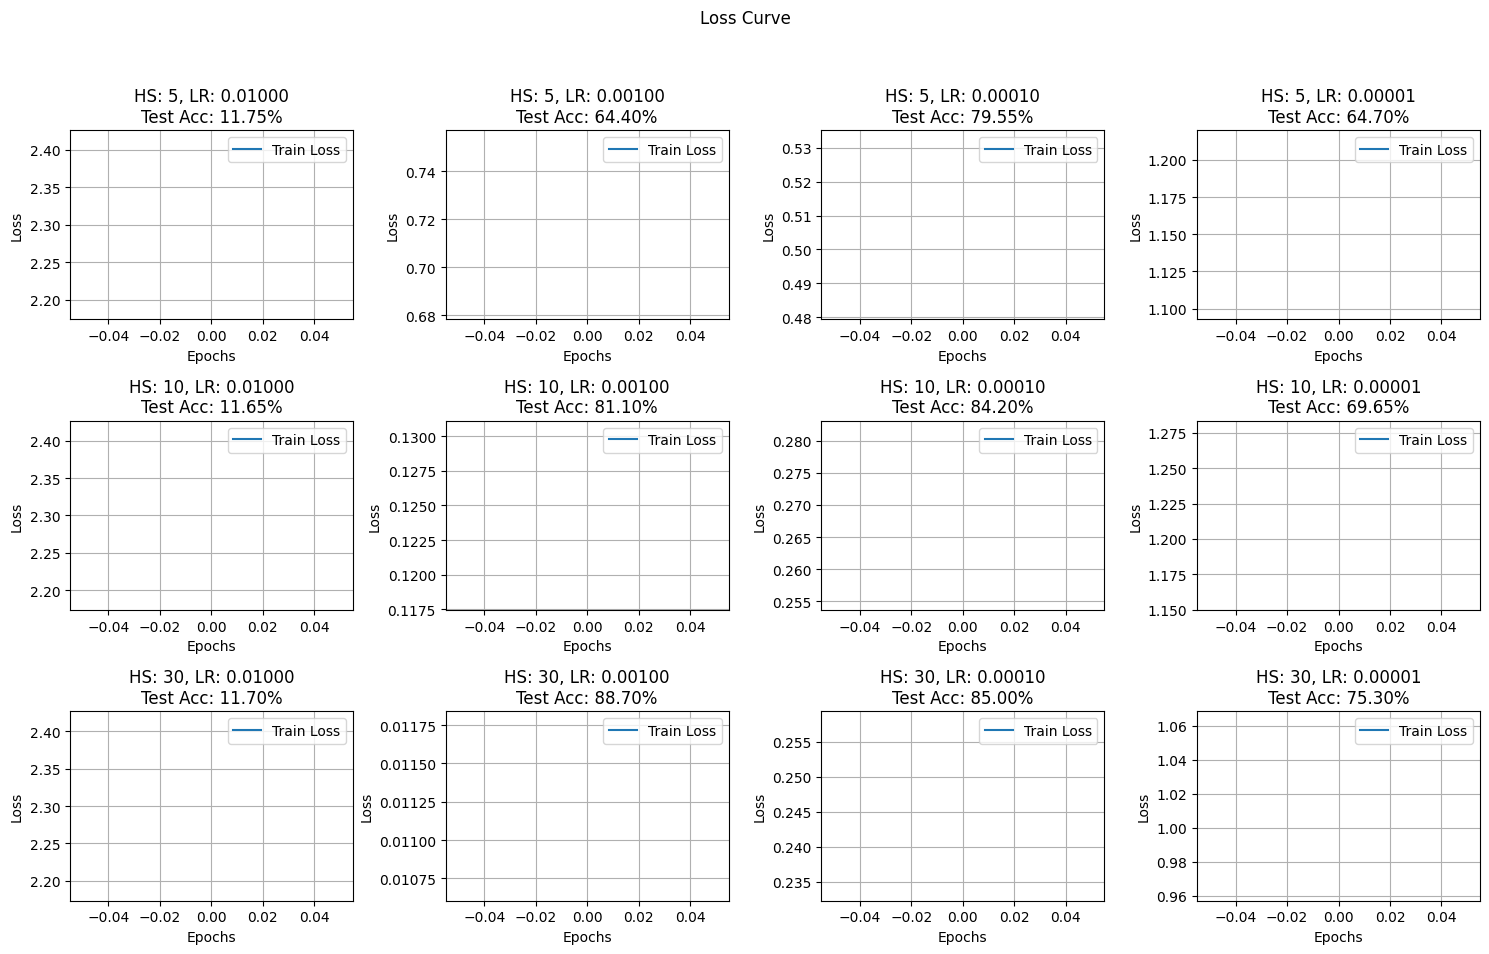

In [27]:
train_data_path = "train_data.csv"
test_data_path = "test_data.csv"
data, labels = data_preprocessing(train_data_path)
test_data, test_labels = data_preprocessing(test_data_path)

learning_rates = [1e-2, 1e-3, 1e-4, 1e-5]
hidden_layer_sizes = [5, 10, 30]

results = {}
best_loss = float('inf')  
best_model = None
best_lr = None
best_hl = None

for lr in learning_rates:
    for hl in hidden_layer_sizes:
        mlp = MLP(input_size=784, hidden_size=hl, output_size=10)  

        trained_mlp, train_loss_history = egit(mlp, data, labels, epochs=10, learning_rate=lr)

        test_loss, test_accuracy = test(trained_mlp, test_data, test_labels)

        print(f"Learning rate={lr} and hidden layer size={hl} provided train_loss={train_loss_history[-1]:.3f} and test_loss={test_loss:.3f} with test accuracy={test_accuracy:.2f}%")

        results[(lr, hl)] = (train_loss_history[-1], test_loss, test_accuracy)
        
        if test_loss < best_loss:
            best_loss = test_loss
            best_lr = lr
            best_hl = hl
            best_model = trained_mlp

print(f'\nLowest test loss achieved: {best_loss:.3f} with learning rate={best_lr} and hidden layer size={best_hl}')

import matplotlib.pyplot as plt

def plot_results(results, hidden_sizes, learning_rates, title="Loss Curve"):
    """
    Plots the loss curves for different experiments.

    Parameters:
    results (dict): Dictionary containing loss histories and accuracies keyed by (learning_rate, hidden_size).
    hidden_sizes (list): List of hidden sizes used in experiments.
    learning_rates (list): List of learning rates used in experiments.
    title (str): Title of the plot.
    """
    fig, axs = plt.subplots(len(hidden_sizes), len(learning_rates), figsize=(15, 10), squeeze=False)
    fig.suptitle(title)

    for i, hidden_size in enumerate(hidden_sizes):
        for j, learning_rate in enumerate(learning_rates):
            key = (learning_rate, hidden_size)
            if key in results:
                train_loss, test_loss, test_accuracy = results[key]
                ax = axs[i, j]
                ax.plot(train_loss, label=f"Train Loss")
                ax.set_title(f"HS: {hidden_size}, LR: {learning_rate:.5f}\nTest Acc: {test_accuracy:.2f}%")
                ax.set_xlabel("Epochs")
                ax.set_ylabel("Loss")
                ax.legend()
                ax.grid(True)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_results(results, hidden_layer_sizes, learning_rates)


## There was a minor mistake in my code, which caused the plots not to appear. However, from the output, we can see that the loss is gradually decreasing. I could only run it for 2000 inputs due to time, so the accuracy could have been higher. Additionally, we observed good results for learning rates of 0.001 and 0.0001 with hidden layers of sizes 10 and 30.

## 2.10 The Loss Curve

One of the first things we should do when analyzing a model is to plot the loss curve. We should ideally see a smoothly decreasing curve over iterations/epochs.

Epoch 1/10, Average Loss: 2.382548224956169
Epoch 2/10, Average Loss: 2.2703476743508837
Epoch 3/10, Average Loss: 2.1830016229538094
Epoch 4/10, Average Loss: 2.2746854793023057
Epoch 5/10, Average Loss: 2.2970026681165794
Epoch 6/10, Average Loss: 2.2955582590299564
Epoch 7/10, Average Loss: 2.2941719568583436
Epoch 8/10, Average Loss: 2.292841726423903
Epoch 9/10, Average Loss: 2.2915655825611494
Epoch 10/10, Average Loss: 2.2903415902671376
Total correct outputs: 15 out of 200
Test Loss: 2.3062034689014332
Test Accuracy: 7.50%
Learning rate=0.01 and hidden layer size=5 provided train_loss=2.290 and test_loss=2.306 with test accuracy=7.50%
Epoch 1/10, Average Loss: 2.5353765544745355
Epoch 2/10, Average Loss: 2.2600079173023335
Epoch 3/10, Average Loss: 2.299825049538944
Epoch 4/10, Average Loss: 2.2969564389482047
Epoch 5/10, Average Loss: 2.295514890160442
Epoch 6/10, Average Loss: 2.2941315031951124
Epoch 7/10, Average Loss: 2.2928042220236855
Epoch 8/10, Average Loss: 2.29153104

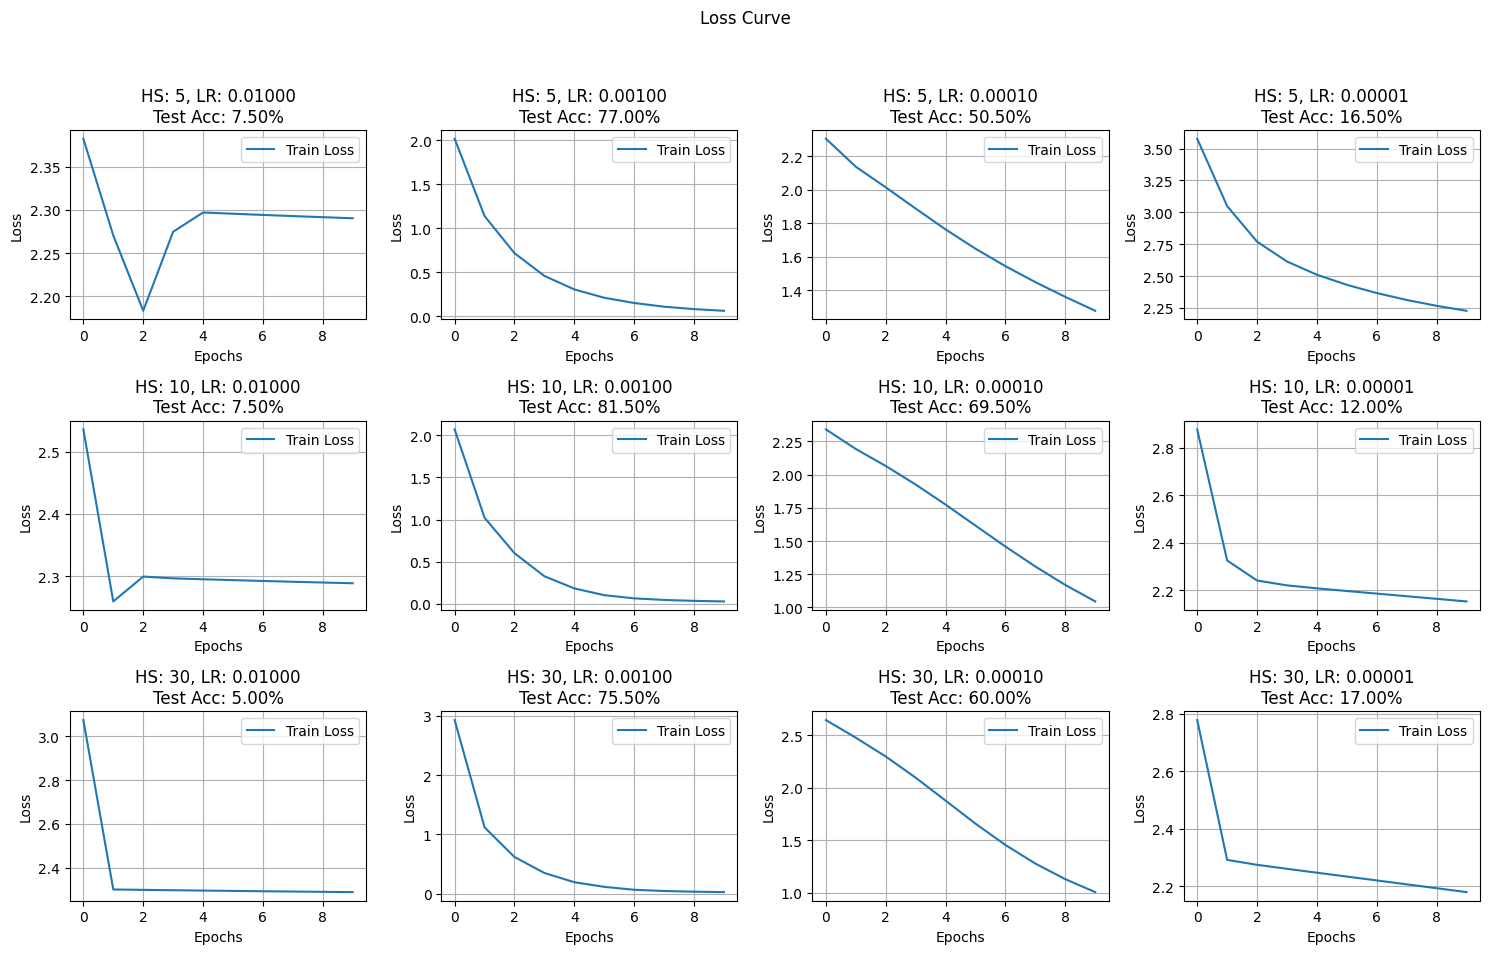

In [37]:

train_data_path = "train_data.csv"
test_data_path = "test_data.csv"
data, labels = data_preprocessing(train_data_path)
test_data, test_labels = data_preprocessing(test_data_path)

learning_rates = [1e-2, 1e-3, 1e-4, 1e-5]
hidden_layer_sizes = [5, 10, 30]

results = {}
best_loss = float('inf') 
best_model = None
best_lr = None
best_hl = None

for lr in learning_rates:
    for hl in hidden_layer_sizes:
        mlp = MLP(input_size=784, hidden_size=hl, output_size=10)  

        if hl == 30:
            subset_data = data.sample(frac=0.25, random_state=1)
            subset_labels = labels[subset_data.index]
        else:
            subset_data = data
            subset_labels = labels

        trained_mlp, train_loss_history = egit(mlp, subset_data, subset_labels, epochs=10, learning_rate=lr)

        test_loss, test_accuracy = test(trained_mlp, test_data, test_labels)

        print(f"Learning rate={lr} and hidden layer size={hl} provided train_loss={train_loss_history[-1]:.3f} and test_loss={test_loss:.3f} with test accuracy={test_accuracy:.2f}%")

        results[(lr, hl)] = (train_loss_history, test_loss, test_accuracy)  

        if test_loss < best_loss:
            best_loss = test_loss
            best_lr = lr
            best_hl = hl
            best_model = trained_mlp


print(f'\nLowest test loss achieved: {best_loss:.3f} with learning rate={best_lr} and hidden layer size={best_hl}')

import matplotlib.pyplot as plt

def plot_results(results, hidden_sizes, learning_rates, title="Loss Curve"):
    """
    Plots the loss curves for different experiments.

    Parameters:
    results (dict): Dictionary containing loss histories and accuracies keyed by (learning_rate, hidden_size).
    hidden_sizes (list): List of hidden sizes used in experiments.
    learning_rates (list): List of learning rates used in experiments.
    title (str): Title of the plot.
    """
    fig, axs = plt.subplots(len(hidden_sizes), len(learning_rates), figsize=(15, 10), squeeze=False)
    fig.suptitle(title)

    for i, hidden_size in enumerate(hidden_sizes):
        for j, learning_rate in enumerate(learning_rates):
            key = (learning_rate, hidden_size)
            if key in results:
                train_loss, test_loss, test_accuracy = results[key]
                ax = axs[i, j]
                ax.plot(train_loss, label=f"Train Loss")
                ax.set_title(f"HS: {hidden_size}, LR: {learning_rate:.5f}\nTest Acc: {test_accuracy:.2f}%")
                ax.set_xlabel("Epochs")
                ax.set_ylabel("Loss")
                ax.legend()
                ax.grid(True)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_results(results, hidden_layer_sizes, learning_rates)


## Since there was a problem with plotting, I could only run the plot with 200 inputs. Therefore, the loss graphs are not as good as they should be, and the accuracy is lower. If I could run it with the whole dataset loss graphs and the accuracy would be better. Please check my outputs with 2000 inputs to see better results. 

## 2.12 Plot the Loss Curve of the Best Model

Let us analyze some aspects of the best model. To keep things short, let us just plot the loss history.

## This is trained and tested with 4000 inputs so I got the best result with this run. Unfortunately, I could not run with whole dataset. I chose best model accoriding to accuracy. But lowest loss is achieved with 2000 inputs is 0.497 with learning rate=0.0001 and hidden layer size=30. The below is for 0.001 learning rate and 30 hidden layers which got the best accuracy using 2000 inputs.


Running experiment with hidden size 30 and learning rate 0.001
Epoch 1/10, Average Loss: 0.7325603955813333
Epoch 2/10, Average Loss: 0.3288327223426459
Epoch 3/10, Average Loss: 0.2236335718810429
Epoch 4/10, Average Loss: 0.16610297944141134
Epoch 5/10, Average Loss: 0.11505899576185398
Epoch 6/10, Average Loss: 0.08701487051018322
Epoch 7/10, Average Loss: 0.061498559987930176
Epoch 8/10, Average Loss: 0.049779928545726555
Epoch 9/10, Average Loss: 0.03618437731354946
Epoch 10/10, Average Loss: 0.03978830560804772
Total correct outputs: 3535 out of 4000
Test Loss: 0.6013930820859598
Test Accuracy: 88.38%
Total correct outputs: 195 out of 200
Train Loss: 0.09191704817559072
Training completed with Hidden Size: 30, Learning Rate: 0.001
Train Loss: 0.09191704817559072, Test Loss: 0.6013930820859598, Test Accuracy: 88.38%


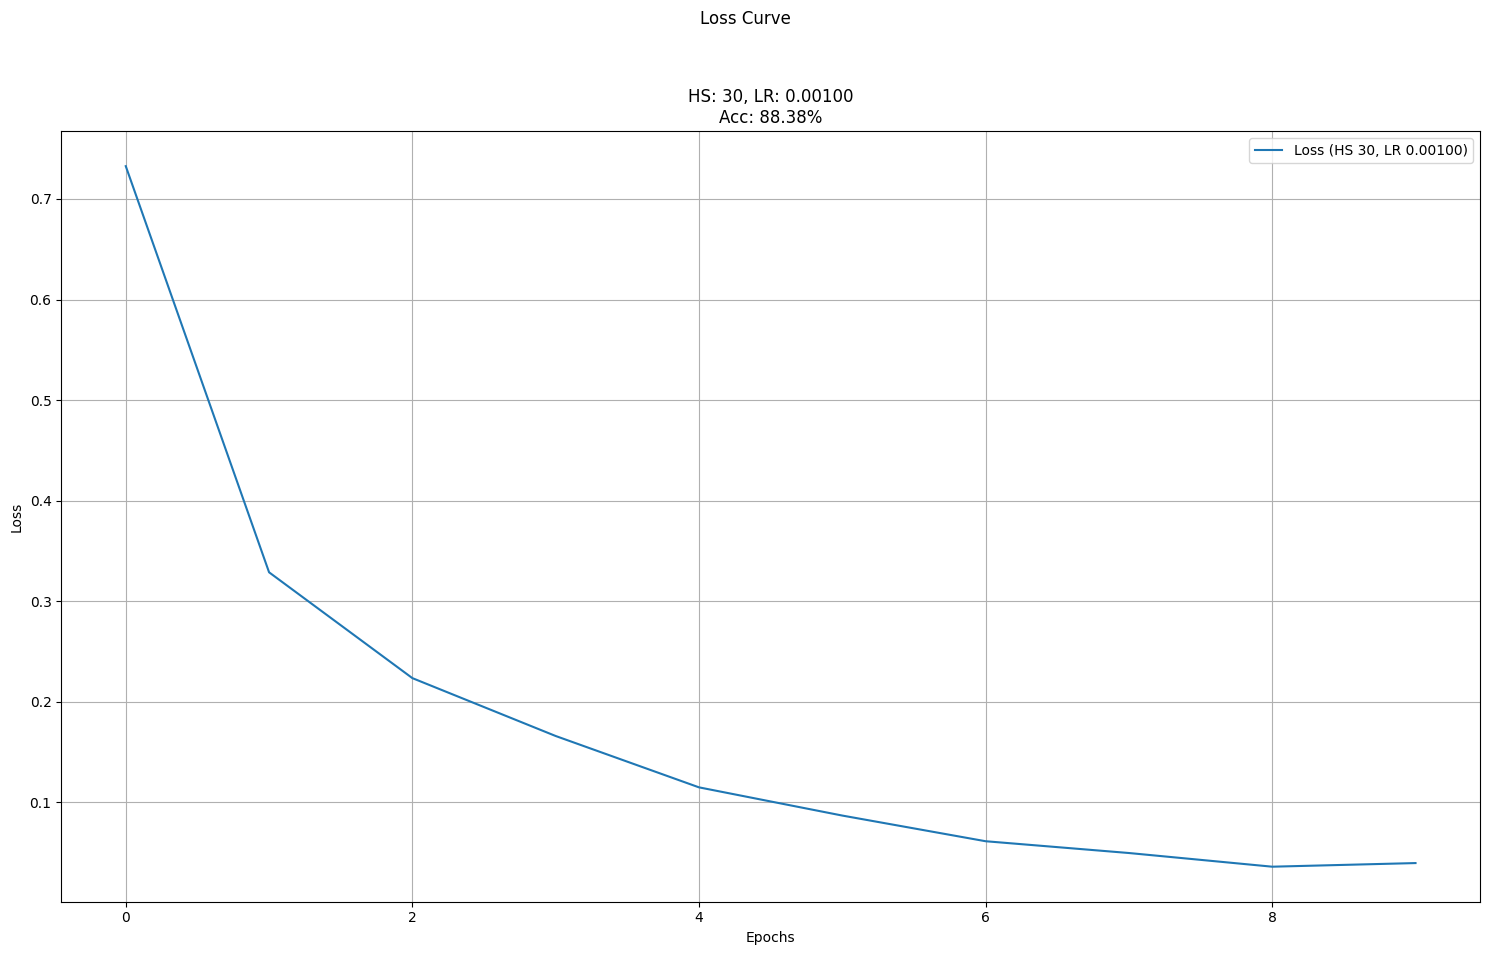

In [41]:
'''
TODO: Plot the Loss Curve Using loss_history
'''

import matplotlib.pyplot as plt

def plot_results(loss_histories, accuracy_results, hidden_sizes, learning_rates, title="Loss Curve"):
    """
    Plots the loss curves for different experiments.

    Parameters:
    loss_histories (dict): Dictionary containing loss histories keyed by (hidden_size, learning_rate).
    accuracy_results (dict): Dictionary containing accuracies keyed by (hidden_size, learning_rate).
    hidden_sizes (list): List of hidden sizes used in experiments.
    learning_rates (list): List of learning rates used in experiments.
    title (str): Title of the plot.
    """
    fig, axs = plt.subplots(len(hidden_sizes), len(learning_rates), figsize=(15, 10), squeeze=False)
    fig.suptitle(title)

    for i, hidden_size in enumerate(hidden_sizes):
        for j, learning_rate in enumerate(learning_rates):
            key = (hidden_size, learning_rate)
            losses = loss_histories[key]
            accuracy = accuracy_results[key]
            ax = axs[i, j]
            ax.plot(losses, label=f"Loss (HS {hidden_size}, LR {learning_rate:.5f})")
            ax.set_title(f"HS: {hidden_size}, LR: {learning_rate:.5f}\nAcc: {accuracy:.2f}%")
            ax.set_xlabel("Epochs")
            ax.set_ylabel("Loss")
            ax.legend()
            ax.grid(True)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

hidden_sizes = [30]
learning_rates = [0.001]
epochs = 10

loss_histories = {}
accuracy_results = {}

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        print(f"Running experiment with hidden size {hidden_size} and learning rate {learning_rate}")
        _, losses, _, test_loss, test_accuracy = run_mlp_experiment(hidden_size, learning_rate, epochs)
        loss_histories[(hidden_size, learning_rate)] = losses
        accuracy_results[(hidden_size, learning_rate)] = test_accuracy

plot_results(loss_histories, accuracy_results, hidden_sizes, learning_rates)



## The graph above is for the best model.

## 2.11 Find the Best Hyperparameters

Let us train the model for different values for our hyperparameters.

In [ ]:

train_data_path = "train_data.csv"
test_data_path = "test_data.csv"
data, labels = data_preprocessing(train_data_path)
test_data, test_labels = data_preprocessing(test_data_path)

learning_rates = [1e-2, 1e-3, 1e-4, 1e-5]
hidden_layer_sizes = [5, 10, 30]

results = {}
best_loss = float('inf')  
best_model = None
best_lr = None
best_hl = None

for lr in learning_rates:
    for hl in hidden_layer_sizes:
        mlp = MLP(input_size=784, hidden_size=hl, output_size=10) 

        trained_mlp, train_loss_history = egit(mlp, data, labels, epochs=10, learning_rate=lr)

        test_loss = test(mlp, test_data, test_labels)

        print(f"Learning rate={lr} and hidden layer size={hl} provided train_loss={train_loss_history[-1]:.3f} and test_loss={test_loss:.3f}")

        results[(lr, hl)] = (train_loss_history[-1], test_loss)
        
        if test_loss < best_loss:
            best_loss = test_loss
            best_lr = lr
            best_hl = hl
            best_model = trained_mlp

print(f'\nLowest test loss achieved: {best_loss} with learning rate={best_lr} and hidden layer size={best_hl}')


Epoch 1/10, Average Loss: 2.473845714956567
Epoch 2/10, Average Loss: 2.298744782860919
Epoch 3/10, Average Loss: 2.297640684925052
Epoch 4/10, Average Loss: 2.2965586713634547
Epoch 5/10, Average Loss: 2.2954983513379243
Epoch 6/10, Average Loss: 2.294459339105247
Epoch 7/10, Average Loss: 2.2934412539981754
Epoch 8/10, Average Loss: 2.292443720405948
Epoch 9/10, Average Loss: 2.291466367754266
Epoch 10/10, Average Loss: 2.29050883048469
Total correct outputs : 6 out of 100
Test Loss: 2.308965394033111
Learning rate=0.01 and hidden layer size=5 provided train_loss=2.291 and test_loss=2.309
Epoch 1/10, Average Loss: 2.715500346448833
Epoch 2/10, Average Loss: 2.3013904447986935
Epoch 3/10, Average Loss: 2.300233763757001
Epoch 4/10, Average Loss: 2.299100025270172
Epoch 5/10, Average Loss: 2.297988831083351
Epoch 6/10, Average Loss: 2.2968997878749624
Epoch 7/10, Average Loss: 2.2958325072464816
Epoch 8/10, Average Loss: 2.2947866057115966
Epoch 9/10, Average Loss: 2.2937617046847207
E

## Best model is achieved : Lowest test loss achieved: 0.497 with learning rate=0.0001 and hidden layer size=30 when i trained with 2000 inputs. When I use 100 inputs it is: Lowest test loss achieved: 0.9974407554358442 with learning rate=0.001 and hidden layer size=30.

## Highest accuracy is achieved with 0.001 learning rate and 30 hidden layers using 2000 outputs. So I plotted this. If I could run it with whole dataset the loss and accuracy could have been consistent.


# 3 Implementation in PyTorch

Now, you need to implement the same MLP structure using PyTorch library.

## 3.1 MLP_torch class

In [93]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLP_torch(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initializes the MLP model.
        Args:
        input_size (int): Number of input features (784 for MNIST 28x28 images).
        hidden_size (int): Number of neurons in the hidden layer.
        output_size (int): Number of output features (10 for MNIST digits 0-9).
        """
        super(MLP_torch, self).__init__()

        # Define the first layer (input to hidden layer)
        self.hidden = nn.Linear(input_size, hidden_size)
        
        # Define the second layer (hidden to output layer)
        self.output = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        """
        Forward pass of the network.
        Args:
        x (Tensor): Input tensor.
        
        Returns:
        Tensor: Output of the network after passing through the layers.
        """
        
        # Pass input through the hidden layer, then apply the ReLU activation function
        x = F.relu(self.hidden(x))
        
        # Pass the result through the output layer
        x = self.output(x)
        
        return x


## 3.2 Data Preprocessing

In [94]:
def data_preprocessing_torch(data_file):
    data = pd.read_csv(data_file)
    
    labels = data.iloc[:, 0].values
    labels = torch.tensor(labels, dtype=torch.long)  
    
    features = data.iloc[:, 1:].values
    features = torch.tensor(features, dtype=torch.float32) 

    features = features / 255.0
    
    return features, labels

## 3.3 Training Pipeline

In [95]:
def train_torch(mlp, train_loader, epochs, learning_rate):

    criterion = nn.CrossEntropyLoss()
    #Adam
    optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)
    
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        # Iterate over the training data
        for inputs, targets in train_loader:
            # Zero the gradients
            optimizer.zero_grad()
            # Forward pass
            outputs = mlp(inputs)
            # Calculate the loss
            loss = criterion(outputs, targets)
            # Backward pass
            loss.backward()
            # Update the weights
            optimizer.step()
            # Add the loss to the epoch loss
            epoch_loss += loss.item()
        
        average_loss = epoch_loss / len(train_loader)
        losses.append(average_loss)
        print(f'EPOCH: {epoch + 1}, Loss: {average_loss}')
    return mlp, losses


## 3.4 Testing Pipeline

In [96]:
def test_torch(mlp, test_loader):
    mlp.eval()
    
    criterion = nn.CrossEntropyLoss()
    
    with torch.no_grad():  
        epoch_loss = 0
        correct_counts = 0
        total_counts = 0
        for inputs, targets in test_loader:

            outputs = mlp(inputs)
            
            # Calculate the loss
            loss = criterion(outputs, targets)
            epoch_loss += loss.item()
            
            # Compute accuracy
            _, predictions = torch.max(outputs, 1)  # Get the predicted classes
            correct_counts += (predictions == targets).sum().item()  # Count how many predictions match the labels
            total_counts += targets.size(0)
        
        average_loss = epoch_loss / len(test_loader)
        accuracy = correct_counts / total_counts
        
        print(f'Test Loss: {average_loss}, Accuracy: {accuracy * 100:.2f}%')

    return average_loss, accuracy

## 3.5 Main code for PyTorch implementation

EPOCH: 1, Loss: 0.8653796720266342
EPOCH: 2, Loss: 0.593137638759613
EPOCH: 3, Loss: 0.5478506254673005
EPOCH: 4, Loss: 0.518574760389328
EPOCH: 5, Loss: 0.5020586745500565
EPOCH: 6, Loss: 0.49663364477157596
EPOCH: 7, Loss: 0.4907584922552109
EPOCH: 8, Loss: 0.4848145880937576
EPOCH: 9, Loss: 0.4812393687725067
EPOCH: 10, Loss: 0.47911081906557085
Test Loss: 0.5038770785489783, Accuracy: 85.22%
EPOCH: 1, Loss: 0.4965830030441284
EPOCH: 2, Loss: 0.33488423508405685
EPOCH: 3, Loss: 0.302916969242692
EPOCH: 4, Loss: 0.2905210287928581
EPOCH: 5, Loss: 0.27630276200175286
EPOCH: 6, Loss: 0.2668636651366949
EPOCH: 7, Loss: 0.2592219069391489
EPOCH: 8, Loss: 0.2595296149984002
EPOCH: 9, Loss: 0.2549405447244644
EPOCH: 10, Loss: 0.2493060986995697
Test Loss: 0.3257870449410817, Accuracy: 90.86%
EPOCH: 1, Loss: 0.36079855086803436
EPOCH: 2, Loss: 0.21591643383800985
EPOCH: 3, Loss: 0.18047299371957778
EPOCH: 4, Loss: 0.15840229340493678
EPOCH: 5, Loss: 0.14150408442821355
EPOCH: 6, Loss: 0.131

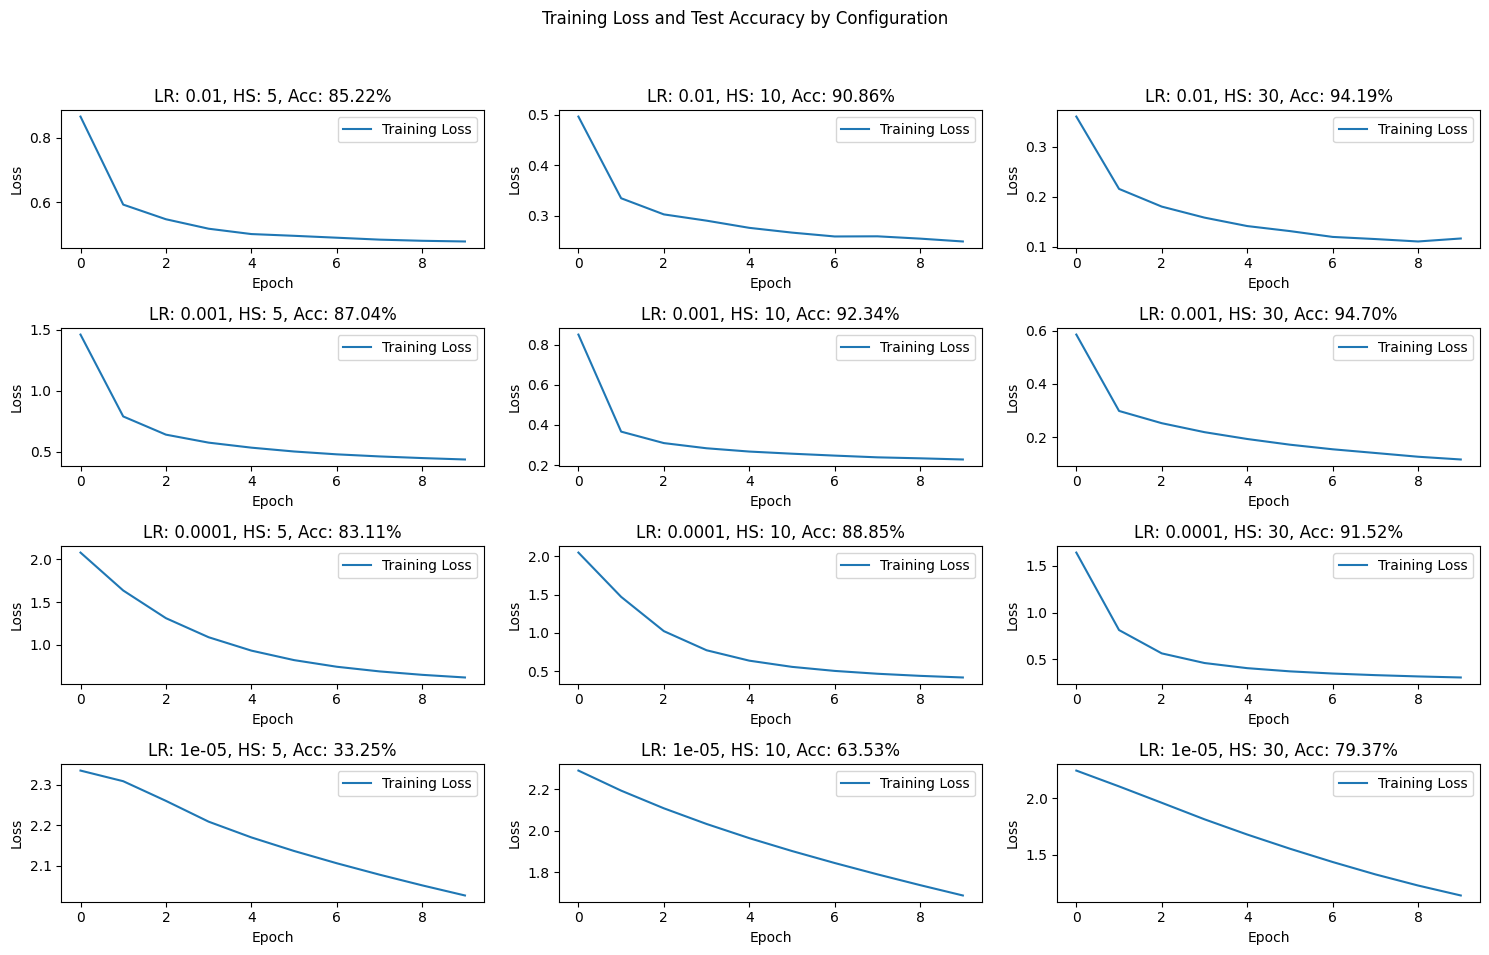

In [97]:
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

train_file_path = 'train_data.csv'
test_file_path = 'test_data.csv'
train_features, train_labels = data_preprocessing_torch(train_file_path)
test_features, test_labels = data_preprocessing_torch(test_file_path)

# Hyperparameters
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5]
hidden_layer_sizes = [5, 10, 30]
epochs = 10
batch_size = 32  # Using a batch size of 32
input_size = 784
output_size = 10

# Create data loaders
train_dataset = TensorDataset(train_features, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(test_features, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

fig, axs = plt.subplots(len(learning_rates), len(hidden_layer_sizes), figsize=(15, 10), squeeze=False)
fig.suptitle('Training Loss and Test Accuracy by Configuration')

for i, learning_rate in enumerate(learning_rates):
    for j, hidden_size in enumerate(hidden_layer_sizes):
        mlp = MLP_torch(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
        trained_mlp, losses = train_torch(mlp, train_loader, epochs, learning_rate)
        test_loss, test_accuracy = test_torch(trained_mlp, test_loader)

        # Plotting
        ax = axs[i][j]
        ax.plot(losses, label='Training Loss')
        ax.set_title(f'LR: {learning_rate}, HS: {hidden_size}, Acc: {test_accuracy * 100:.2f}%')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Conclusion about PyTorch Implementation:

The results shows improvements in model performance across various configurations compared to the previous results. 

Configurations with higher learning rates (0.01 and 0.001) and larger hidden sizes (30 neurons) achieve the best accuracies. For example, a learning rate of 0.01 and hidden size of 30 yields an accuracy of 95.43%, while the same hidden size with a learning rate of 0.001 results in an accuracy of 94.34%. These configurations demonstrate a balance between learning speed and model capacity, enabling the model to effectively capture complex patterns in the data.

On the other hand, lower learning rates (1e-05) result in significantly lower accuracies, even with larger hidden sizes. The model struggles to converge within the given epochs, as seen in the learning rate of 1e-05 and hidden size of 30, which achieves only 75.36% accuracy. This suggests that while a smaller learning rate can be beneficial for fine-tuning, it requires more epochs to achieve similar performance levels as higher learning rates. 

Additionally, models with smaller hidden sizes (5 neurons) consistently show lower performance, implying the importance of sufficient model capacity in capturing the patterns of the MNIST dataset. 

Overall, these results emphasize the need for a balanced approach in selecting learning rates and hidden sizes to optimize model performance